# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

22:16:42 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=404586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=796862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=528642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=927930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

22:16:43 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=829221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=541399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

22:16:45 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=892087;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=306023;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#89\89]8;;\

22:16:46 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=907206;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=207849;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#89\89]8;;\

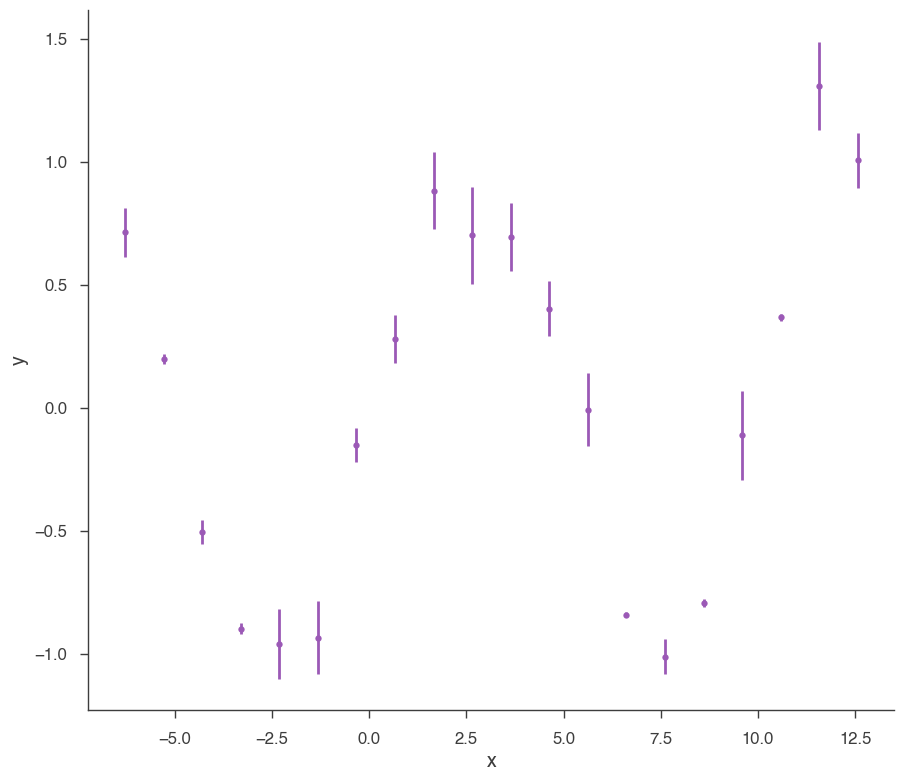

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=775112;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=530610;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

22:16:51 INFO      Mean acceptance fraction: 0.7160999999999998                                ]8;id=169819;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=887268;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

22:16:52 INFO      fit restored to maximum of posterior                                         ]8;id=424217;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=803137;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=86009;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=710916;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.009 +/- 0.010,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.991 -0.019 +0.017) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-14.402716
total,-14.402716


Values of statistical measures:

,statistical measures
AIC,33.511314
BIC,34.796897
DIC,32.745361
PDIC,1.966435


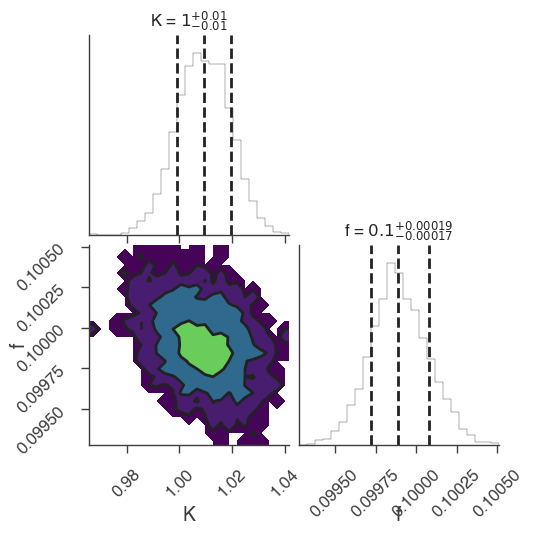

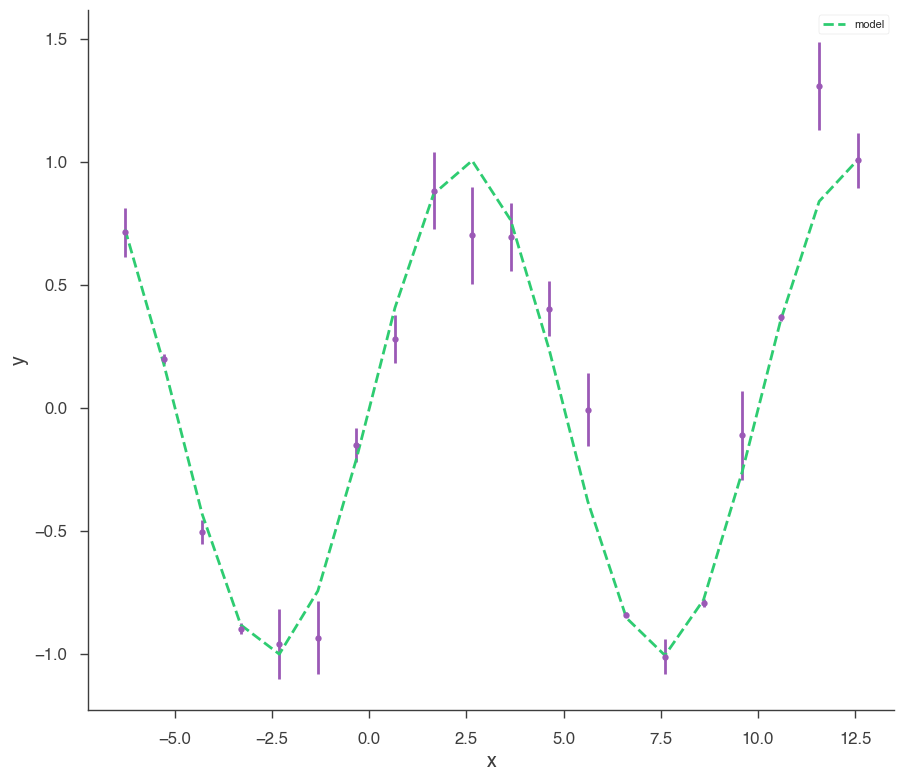

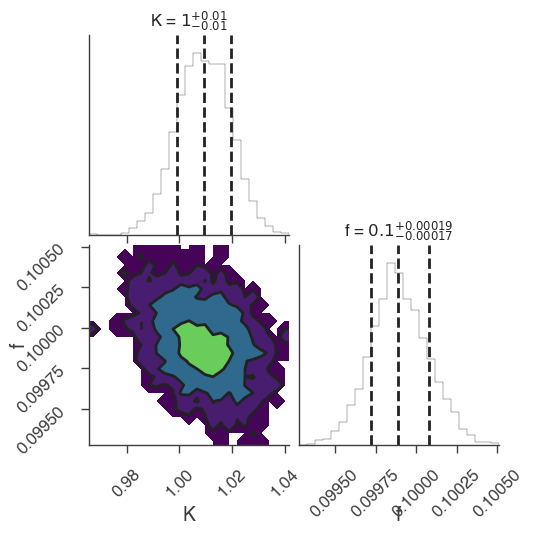

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

22:16:53 INFO      sampler set to multinest                                                ]8;id=621603;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=403236;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -25.369269330696934      +/-  0.15803955296587277     
 Total Likelihood Evaluations:         6272
 Sampling finished. Exiting MultiNest



22:16:55 INFO      fit restored to maximum of posterior                                         ]8;id=290915;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=661870;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=615565;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=472018;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.009 -0.009 +0.010,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.991 -0.020 +0.019) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-14.406367
total,-14.406367


Values of statistical measures:

,statistical measures
AIC,33.518616
BIC,34.804198
DIC,32.792721
PDIC,1.992372
log(Z),-11.017734


         INFO      deleting the chain directory chains                                     ]8;id=404088;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=94328;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

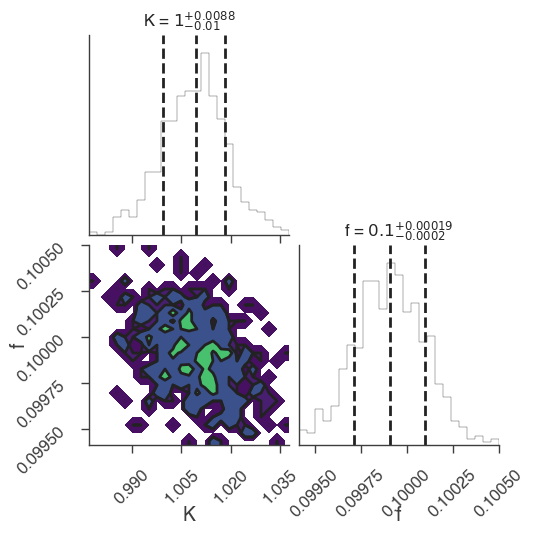

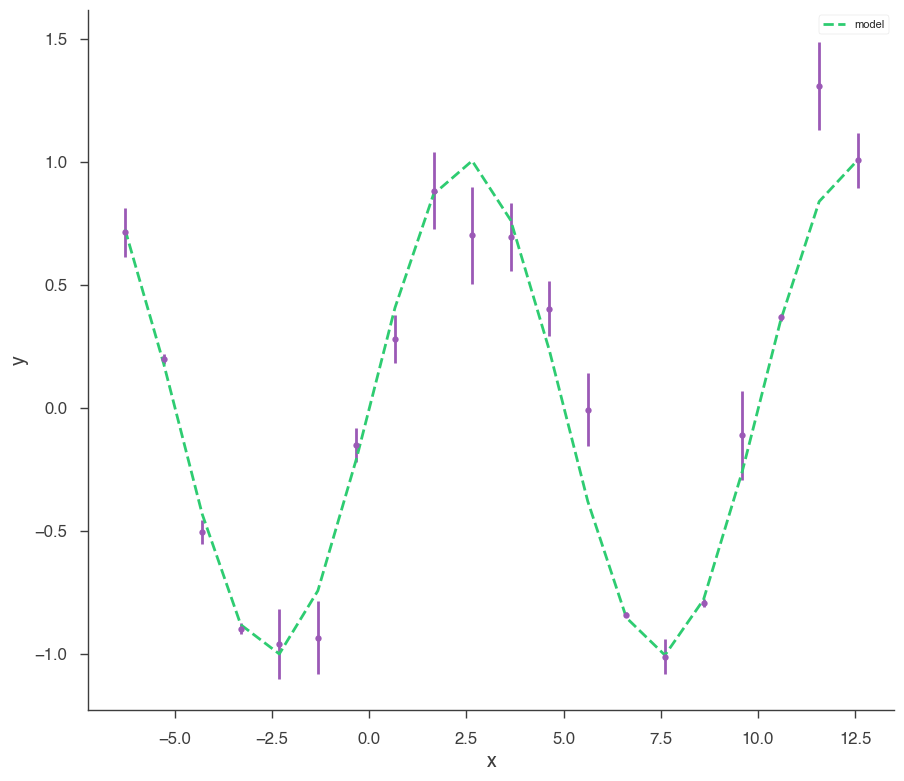

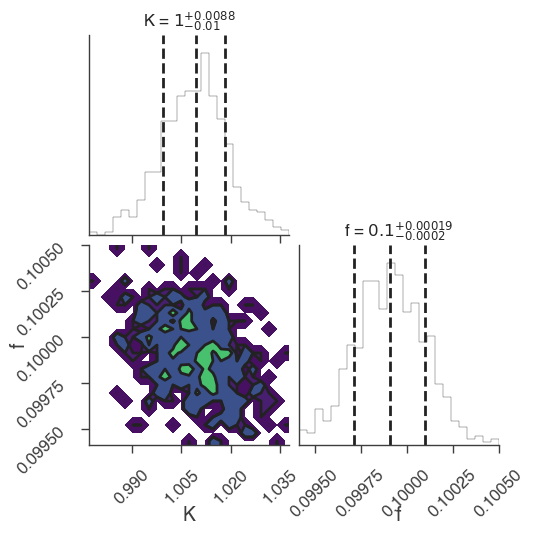

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

         INFO      sampler set to dynesty_nested                                           ]8;id=911572;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=774873;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

125it [00:00, 1244.13it/s, bound: 0 | nc: 1 | ncall: 543 | eff(%): 23.020 | loglstar:   -inf < -15410.827 <    inf | logz: -15417.824 +/-  0.132 | dlogz: 15393.338 >  0.409]

250it [00:00, 1145.79it/s, bound: 0 | nc: 1 | ncall: 733 | eff(%): 34.106 | loglstar:   -inf < -11392.327 <    inf | logz: -11399.636 +/-  0.135 | dlogz: 11383.848 >  0.409]

366it [00:00, 1073.16it/s, bound: 0 | nc: 2 | ncall: 938 | eff(%): 39.019 | loglstar:   -inf < -8957.855 <    inf | logz: -8965.041 +/-  0.130 | dlogz: 8942.757 >  0.409]   

474it [00:00, 923.36it/s, bound: 0 | nc: 2 | ncall: 1221 | eff(%): 38.821 | loglstar:   -inf < -7287.713 <    inf | logz: -7295.422 +/-  0.135 | dlogz: 7273.700 >  0.409]

569it [00:00, 754.45it/s, bound: 0 | nc: 7 | ncall: 1592 | eff(%): 35.741 | loglstar:   -inf < -6110.833 <    inf | logz: -6118.938 +/-  0.142 | dlogz: 6117.910 >  0.409]

650it [00:00, 678.67it/s, bound: 0 | nc: 1 | ncall: 1901 | eff(%): 34.193 | loglstar:   -inf < -5456.676 <    inf | logz: -5464.154 +/-  0.134 | dlogz: 5440.644 >  0.409]

722it [00:00, 581.79it/s, bound: 0 | nc: 2 | ncall: 2253 | eff(%): 32.046 | loglstar:   -inf < -4778.588 <    inf | logz: -4786.991 +/-  0.143 | dlogz: 4765.296 >  0.409]

784it [00:01, 476.15it/s, bound: 0 | nc: 4 | ncall: 2637 | eff(%): 29.731 | loglstar:   -inf < -4308.767 <    inf | logz: -4317.388 +/-  0.146 | dlogz: 4296.800 >  0.409]

836it [00:01, 441.62it/s, bound: 0 | nc: 16 | ncall: 3011 | eff(%): 27.765 | loglstar:   -inf < -4056.811 <    inf | logz: -4065.530 +/-  0.146 | dlogz: 4043.981 >  0.409]

883it [00:01, 389.11it/s, bound: 0 | nc: 24 | ncall: 3401 | eff(%): 25.963 | loglstar:   -inf < -3858.287 <    inf | logz: -3867.148 +/-  0.147 | dlogz: 3845.655 >  0.409]

924it [00:01, 390.32it/s, bound: 0 | nc: 4 | ncall: 3723 | eff(%): 24.819 | loglstar:   -inf < -3533.863 <    inf | logz: -3542.855 +/-  0.150 | dlogz: 3559.754 >  0.409] 

965it [00:01, 332.24it/s, bound: 0 | nc: 7 | ncall: 4146 | eff(%): 23.275 | loglstar:   -inf < -3228.025 <    inf | logz: -3236.631 +/-  0.143 | dlogz: 3213.346 >  0.409]

1000it [00:01, 286.28it/s, bound: 0 | nc: 1 | ncall: 4566 | eff(%): 21.901 | loglstar:   -inf < -2995.745 <    inf | logz: -3004.714 +/-  0.146 | dlogz: 2982.042 >  0.409]

1031it [00:02, 272.89it/s, bound: 0 | nc: 8 | ncall: 4884 | eff(%): 21.110 | loglstar:   -inf < -2854.204 <    inf | logz: -2862.593 +/-  0.141 | dlogz: 2838.618 >  0.409]

1060it [00:02, 245.96it/s, bound: 0 | nc: 25 | ncall: 5253 | eff(%): 20.179 | loglstar:   -inf < -2726.691 <    inf | logz: -2735.926 +/-  0.149 | dlogz: 2713.463 >  0.409]

1086it [00:02, 238.03it/s, bound: 0 | nc: 33 | ncall: 5605 | eff(%): 19.376 | loglstar:   -inf < -2596.720 <    inf | logz: -2606.115 +/-  0.153 | dlogz: 2589.003 >  0.409]

1111it [00:02, 207.98it/s, bound: 0 | nc: 5 | ncall: 6049 | eff(%): 18.367 | loglstar:   -inf < -2521.027 <    inf | logz: -2530.405 +/-  0.151 | dlogz: 2508.361 >  0.409] 

1133it [00:02, 178.55it/s, bound: 0 | nc: 4 | ncall: 6440 | eff(%): 17.593 | loglstar:   -inf < -2446.405 <    inf | logz: -2455.906 +/-  0.153 | dlogz: 2437.900 >  0.409]

1152it [00:02, 175.63it/s, bound: 0 | nc: 8 | ncall: 6714 | eff(%): 17.158 | loglstar:   -inf < -2415.163 <    inf | logz: -2424.704 +/-  0.154 | dlogz: 2406.158 >  0.409]

1170it [00:03, 152.61it/s, bound: 0 | nc: 56 | ncall: 7127 | eff(%): 16.416 | loglstar:   -inf < -2358.615 <    inf | logz: -2367.610 +/-  0.143 | dlogz: 2345.607 >  0.409]

1186it [00:03, 124.04it/s, bound: 0 | nc: 57 | ncall: 7460 | eff(%): 15.898 | loglstar:   -inf < -2310.244 <    inf | logz: -2319.890 +/-  0.155 | dlogz: 2306.337 >  0.409]

1200it [00:03, 121.94it/s, bound: 0 | nc: 40 | ncall: 7709 | eff(%): 15.566 | loglstar:   -inf < -2244.655 <    inf | logz: -2254.162 +/-  0.151 | dlogz: 2233.529 >  0.409]

1213it [00:03, 118.88it/s, bound: 0 | nc: 63 | ncall: 7949 | eff(%): 15.260 | loglstar:   -inf < -2143.724 <    inf | logz: -2153.437 +/-  0.156 | dlogz: 2148.557 >  0.409]

1226it [00:03, 117.92it/s, bound: 0 | nc: 8 | ncall: 8219 | eff(%): 14.917 | loglstar:   -inf < -2061.010 <    inf | logz: -2070.711 +/-  0.154 | dlogz: 2051.055 >  0.409] 

1239it [00:03, 115.29it/s, bound: 0 | nc: 22 | ncall: 8506 | eff(%): 14.566 | loglstar:   -inf < -1985.890 <    inf | logz: -1995.396 +/-  0.150 | dlogz: 1974.128 >  0.409]

1252it [00:03, 118.79it/s, bound: 0 | nc: 4 | ncall: 8745 | eff(%): 14.317 | loglstar:   -inf < -1918.030 <    inf | logz: -1927.549 +/-  0.149 | dlogz: 1906.093 >  0.409] 

1267it [00:03, 117.03it/s, bound: 0 | nc: 104 | ncall: 9039 | eff(%): 14.017 | loglstar:   -inf < -1840.396 <    inf | logz: -1850.231 +/-  0.156 | dlogz: 1834.078 >  0.409]

1280it [00:04, 120.17it/s, bound: 0 | nc: 29 | ncall: 9280 | eff(%): 13.793 | loglstar:   -inf < -1773.425 <    inf | logz: -1783.305 +/-  0.157 | dlogz: 1778.963 >  0.409] 

1298it [00:04, 132.18it/s, bound: 0 | nc: 48 | ncall: 9551 | eff(%): 13.590 | loglstar:   -inf < -1654.737 <    inf | logz: -1664.663 +/-  0.157 | dlogz: 1654.154 >  0.409]

1312it [00:04, 106.21it/s, bound: 0 | nc: 19 | ncall: 10037 | eff(%): 13.072 | loglstar:   -inf < -1596.495 <    inf | logz: -1605.271 +/-  0.141 | dlogz: 1584.870 >  0.409]

1324it [00:04, 83.70it/s, bound: 0 | nc: 22 | ncall: 10609 | eff(%): 12.480 | loglstar:   -inf < -1543.397 <    inf | logz: -1553.377 +/-  0.157 | dlogz: 1537.398 >  0.409] 

1335it [00:04, 86.94it/s, bound: 0 | nc: 34 | ncall: 10884 | eff(%): 12.266 | loglstar:   -inf < -1513.135 <    inf | logz: -1523.148 +/-  0.158 | dlogz: 1507.981 >  0.409]

1345it [00:04, 82.92it/s, bound: 0 | nc: 18 | ncall: 11214 | eff(%): 11.994 | loglstar:   -inf < -1478.957 <    inf | logz: -1487.939 +/-  0.144 | dlogz: 1467.578 >  0.409]

1354it [00:04, 76.91it/s, bound: 0 | nc: 25 | ncall: 11557 | eff(%): 11.716 | loglstar:   -inf < -1454.358 <    inf | logz: -1464.408 +/-  0.158 | dlogz: 1447.812 >  0.409]

1366it [00:05, 85.44it/s, bound: 0 | nc: 33 | ncall: 11813 | eff(%): 11.564 | loglstar:   -inf < -1422.567 <    inf | logz: -1431.968 +/-  0.146 | dlogz: 1411.857 >  0.409]

1376it [00:05, 86.53it/s, bound: 0 | nc: 46 | ncall: 12075 | eff(%): 11.395 | loglstar:   -inf < -1386.741 <    inf | logz: -1396.861 +/-  0.159 | dlogz: 1385.901 >  0.409]

1387it [00:05, 88.33it/s, bound: 0 | nc: 65 | ncall: 12345 | eff(%): 11.235 | loglstar:   -inf < -1352.696 <    inf | logz: -1362.194 +/-  0.148 | dlogz: 1342.157 >  0.409]

1401it [00:05, 99.03it/s, bound: 0 | nc: 50 | ncall: 12604 | eff(%): 11.116 | loglstar:   -inf < -1319.286 <    inf | logz: -1328.812 +/-  0.147 | dlogz: 1308.645 >  0.409]

1412it [00:05, 81.76it/s, bound: 0 | nc: 66 | ncall: 13093 | eff(%): 10.784 | loglstar:   -inf < -1296.474 <    inf | logz: -1305.635 +/-  0.144 | dlogz: 1285.171 >  0.409]

1422it [00:05, 84.26it/s, bound: 0 | nc: 36 | ncall: 13355 | eff(%): 10.648 | loglstar:   -inf < -1282.762 <    inf | logz: -1291.821 +/-  0.148 | dlogz: 1271.458 >  0.409]

1431it [00:05, 76.59it/s, bound: 0 | nc: 60 | ncall: 13712 | eff(%): 10.436 | loglstar:   -inf < -1256.321 <    inf | logz: -1266.430 +/-  0.155 | dlogz: 1247.582 >  0.409]

1440it [00:05, 76.84it/s, bound: 0 | nc: 1 | ncall: 13987 | eff(%): 10.295 | loglstar:   -inf < -1236.862 <    inf | logz: -1246.811 +/-  0.152 | dlogz: 1227.109 >  0.409] 

1448it [00:06, 67.15it/s, bound: 0 | nc: 117 | ncall: 14391 | eff(%): 10.062 | loglstar:   -inf < -1228.929 <    inf | logz: -1237.788 +/-  0.145 | dlogz: 1217.032 >  0.409]

1461it [00:06, 58.68it/s, bound: 1 | nc: 1 | ncall: 14612 | eff(%):  9.999 | loglstar:   -inf < -1189.283 <    inf | logz: -1199.615 +/-  0.161 | dlogz: 1185.854 >  0.409]  

1576it [00:06, 268.77it/s, bound: 1 | nc: 3 | ncall: 14759 | eff(%): 10.678 | loglstar:   -inf < -892.315 <    inf | logz: -902.475 +/-  0.156 | dlogz: 882.517 >  0.409]  

1662it [00:06, 395.94it/s, bound: 1 | nc: 1 | ncall: 14923 | eff(%): 11.137 | loglstar:   -inf < -750.924 <    inf | logz: -761.281 +/-  0.156 | dlogz: 740.949 >  0.409]

1740it [00:06, 485.95it/s, bound: 1 | nc: 1 | ncall: 15091 | eff(%): 11.530 | loglstar:   -inf < -640.451 <    inf | logz: -650.558 +/-  0.156 | dlogz: 629.633 >  0.409]

1801it [00:06, 365.11it/s, bound: 2 | nc: 1 | ncall: 15222 | eff(%): 11.832 | loglstar:   -inf < -555.763 <    inf | logz: -565.234 +/-  0.149 | dlogz: 543.419 >  0.409]

1914it [00:07, 519.20it/s, bound: 2 | nc: 1 | ncall: 15366 | eff(%): 12.456 | loglstar:   -inf < -420.009 <    inf | logz: -430.190 +/-  0.155 | dlogz: 410.251 >  0.409]

2002it [00:07, 599.88it/s, bound: 2 | nc: 1 | ncall: 15521 | eff(%): 12.899 | loglstar:   -inf < -344.182 <    inf | logz: -355.557 +/-  0.163 | dlogz: 336.380 >  0.409]

2096it [00:07, 676.98it/s, bound: 2 | nc: 10 | ncall: 15711 | eff(%): 13.341 | loglstar:   -inf < -279.459 <    inf | logz: -290.126 +/-  0.157 | dlogz: 269.773 >  0.409]

2176it [00:07, 487.91it/s, bound: 3 | nc: 1 | ncall: 15859 | eff(%): 13.721 | loglstar:   -inf < -231.689 <    inf | logz: -242.623 +/-  0.158 | dlogz: 222.602 >  0.409] 

2299it [00:07, 636.98it/s, bound: 3 | nc: 1 | ncall: 16029 | eff(%): 14.343 | loglstar:   -inf < -178.440 <    inf | logz: -189.590 +/-  0.160 | dlogz: 170.125 >  0.409]

2403it [00:07, 725.94it/s, bound: 3 | nc: 2 | ncall: 16216 | eff(%): 14.819 | loglstar:   -inf < -141.364 <    inf | logz: -151.538 +/-  0.154 | dlogz: 131.302 >  0.409]

2492it [00:08, 527.40it/s, bound: 4 | nc: 1 | ncall: 16430 | eff(%): 15.167 | loglstar:   -inf < -112.145 <    inf | logz: -123.102 +/-  0.159 | dlogz: 102.788 >  0.409]

2599it [00:08, 631.11it/s, bound: 4 | nc: 1 | ncall: 16581 | eff(%): 15.675 | loglstar:   -inf < -92.915 <    inf | logz: -103.505 +/-  0.154 | dlogz: 82.764 >  0.409]  

2694it [00:08, 697.95it/s, bound: 4 | nc: 5 | ncall: 16737 | eff(%): 16.096 | loglstar:   -inf < -78.271 <    inf | logz: -88.872 +/-  0.156 | dlogz: 67.859 >  0.409] 

2796it [00:08, 773.02it/s, bound: 4 | nc: 1 | ncall: 16942 | eff(%): 16.503 | loglstar:   -inf < -63.909 <    inf | logz: -74.748 +/-  0.158 | dlogz: 53.486 >  0.409]

2887it [00:08, 594.27it/s, bound: 5 | nc: 1 | ncall: 17093 | eff(%): 16.890 | loglstar:   -inf < -54.768 <    inf | logz: -65.446 +/-  0.155 | dlogz: 43.916 >  0.409]

2979it [00:08, 661.51it/s, bound: 5 | nc: 1 | ncall: 17226 | eff(%): 17.294 | loglstar:   -inf < -45.553 <    inf | logz: -56.417 +/-  0.159 | dlogz: 34.654 >  0.409]

3062it [00:08, 697.73it/s, bound: 5 | nc: 6 | ncall: 17397 | eff(%): 17.601 | loglstar:   -inf < -40.241 <    inf | logz: -51.102 +/-  0.157 | dlogz: 29.118 >  0.409]

3147it [00:08, 731.15it/s, bound: 5 | nc: 5 | ncall: 17570 | eff(%): 17.911 | loglstar:   -inf < -35.851 <    inf | logz: -46.675 +/-  0.157 | dlogz: 24.462 >  0.409]

3229it [00:09, 528.33it/s, bound: 6 | nc: 1 | ncall: 17694 | eff(%): 18.249 | loglstar:   -inf < -32.345 <    inf | logz: -43.150 +/-  0.156 | dlogz: 20.723 >  0.409]

3347it [00:09, 662.24it/s, bound: 6 | nc: 5 | ncall: 17858 | eff(%): 18.742 | loglstar:   -inf < -28.327 <    inf | logz: -39.104 +/-  0.157 | dlogz: 16.372 >  0.409]

3436it [00:09, 713.21it/s, bound: 6 | nc: 1 | ncall: 18026 | eff(%): 19.061 | loglstar:   -inf < -25.250 <    inf | logz: -36.207 +/-  0.158 | dlogz: 13.252 >  0.409]

3520it [00:09, 724.03it/s, bound: 6 | nc: 1 | ncall: 18209 | eff(%): 19.331 | loglstar:   -inf < -23.175 <    inf | logz: -34.158 +/-  0.158 | dlogz: 10.989 >  0.409]

3602it [00:09, 539.31it/s, bound: 7 | nc: 1 | ncall: 18309 | eff(%): 19.673 | loglstar:   -inf < -21.628 <    inf | logz: -32.567 +/-  0.158 | dlogz:  9.189 >  0.409]

3701it [00:09, 632.00it/s, bound: 7 | nc: 1 | ncall: 18465 | eff(%): 20.043 | loglstar:   -inf < -19.923 <    inf | logz: -30.938 +/-  0.158 | dlogz:  7.316 >  0.409]

3779it [00:09, 664.75it/s, bound: 7 | nc: 3 | ncall: 18634 | eff(%): 20.280 | loglstar:   -inf < -18.980 <    inf | logz: -29.920 +/-  0.158 | dlogz:  6.101 >  0.409]

3856it [00:10, 686.17it/s, bound: 7 | nc: 1 | ncall: 18807 | eff(%): 20.503 | loglstar:   -inf < -18.164 <    inf | logz: -29.130 +/-  0.158 | dlogz:  5.121 >  0.409]

3933it [00:10, 547.93it/s, bound: 8 | nc: 2 | ncall: 18900 | eff(%): 20.810 | loglstar:   -inf < -17.506 <    inf | logz: -28.467 +/-  0.158 | dlogz:  4.271 >  0.409]

4041it [00:10, 665.19it/s, bound: 8 | nc: 1 | ncall: 19052 | eff(%): 21.210 | loglstar:   -inf < -16.921 <    inf | logz: -27.773 +/-  0.157 | dlogz:  3.328 >  0.409]

4133it [00:10, 726.14it/s, bound: 8 | nc: 6 | ncall: 19214 | eff(%): 21.510 | loglstar:   -inf < -16.412 <    inf | logz: -27.316 +/-  0.157 | dlogz:  2.675 >  0.409]

4215it [00:10, 739.77it/s, bound: 8 | nc: 3 | ncall: 19391 | eff(%): 21.737 | loglstar:   -inf < -16.100 <    inf | logz: -26.982 +/-  0.157 | dlogz:  2.184 >  0.409]

4296it [00:10, 566.33it/s, bound: 9 | nc: 1 | ncall: 19497 | eff(%): 22.034 | loglstar:   -inf < -15.746 <    inf | logz: -26.708 +/-  0.157 | dlogz:  1.774 >  0.409]

4399it [00:10, 667.20it/s, bound: 9 | nc: 3 | ncall: 19651 | eff(%): 22.386 | loglstar:   -inf < -15.445 <    inf | logz: -26.416 +/-  0.157 | dlogz:  1.341 >  0.409]

4477it [00:10, 686.76it/s, bound: 9 | nc: 3 | ncall: 19827 | eff(%): 22.580 | loglstar:   -inf < -15.254 <    inf | logz: -26.239 +/-  0.158 | dlogz:  1.081 >  0.409]

4555it [00:11, 710.10it/s, bound: 9 | nc: 1 | ncall: 19996 | eff(%): 22.780 | loglstar:   -inf < -15.094 <    inf | logz: -26.092 +/-  0.158 | dlogz:  0.869 >  0.409]

4633it [00:11, 507.58it/s, bound: 10 | nc: 1 | ncall: 20106 | eff(%): 23.043 | loglstar:   -inf < -14.951 <    inf | logz: -25.969 +/-  0.158 | dlogz:  0.698 >  0.409]

4740it [00:11, 624.59it/s, bound: 10 | nc: 1 | ncall: 20253 | eff(%): 23.404 | loglstar:   -inf < -14.834 <    inf | logz: -25.835 +/-  0.158 | dlogz:  0.516 >  0.409]

4823it [00:11, 671.65it/s, +47 | bound: 10 | nc: 1 | ncall: 20451 | eff(%): 23.868 | loglstar:   -inf < -14.711 <    inf | logz: -25.712 +/-  0.158 | dlogz:  0.356 >  0.409]

4823it [00:11, 415.05it/s, +400 | bound: 10 | nc: 1 | ncall: 20804 | eff(%): 25.598 | loglstar:   -inf < -14.395 <    inf | logz: -25.401 +/-  0.158 | dlogz:  0.001 >  0.409]

22:17:08 INFO      fit restored to maximum of posterior                                         ]8;id=398276;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=335161;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=207732;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=772050;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.010 +/- 0.010,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.992 -0.019 +0.017) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-14.405043
total,-14.405043


Values of statistical measures:

,statistical measures
AIC,33.515968
BIC,34.801550
DIC,32.926454
PDIC,2.060251
log(Z),-11.031479


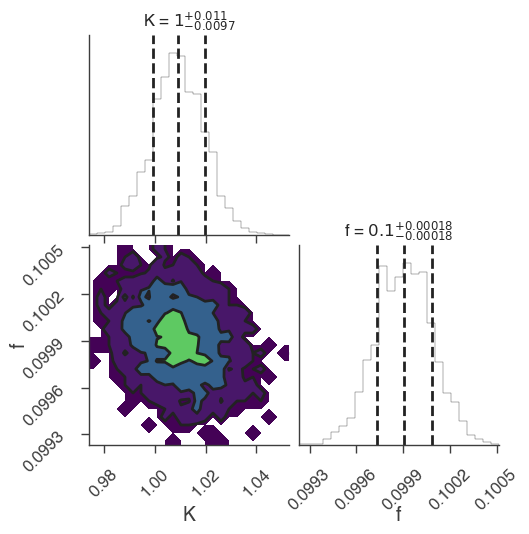

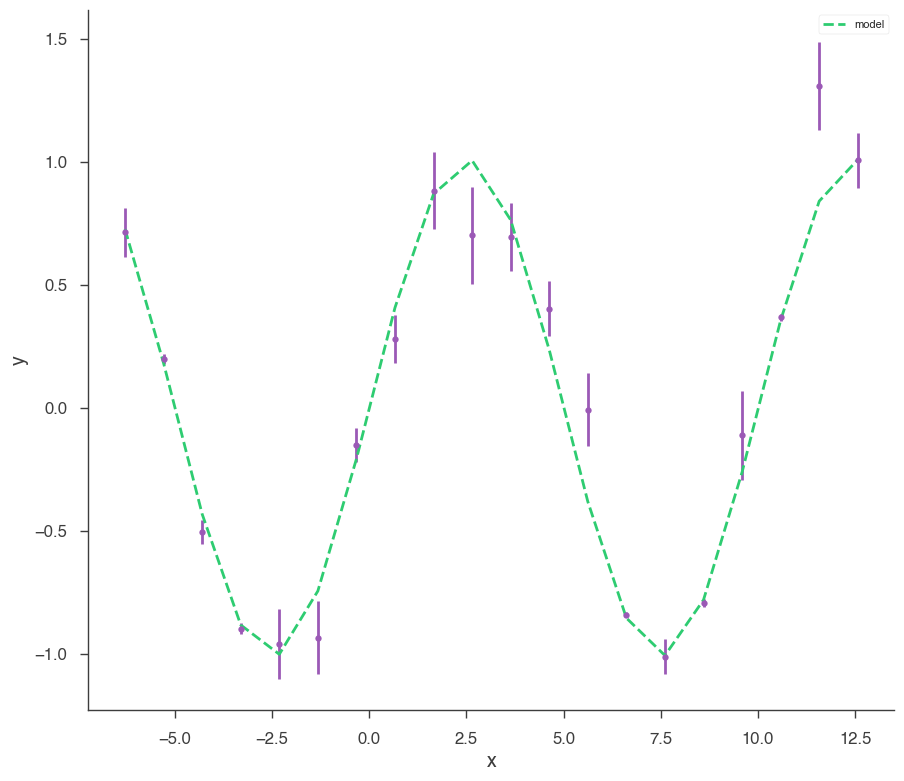

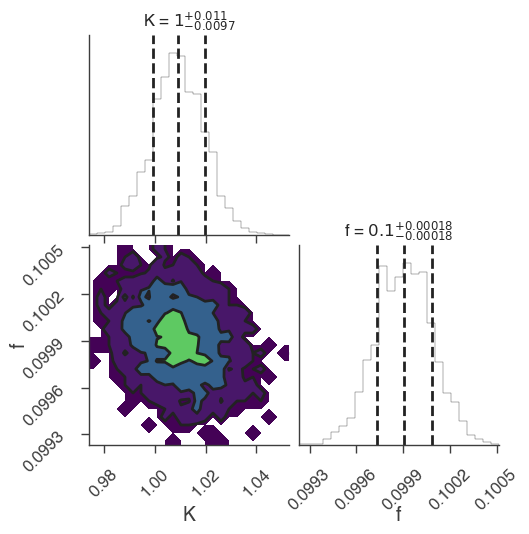

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

         INFO      sampler set to dynesty_dynamic                                          ]8;id=822434;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=798373;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

37it [00:00, 369.04it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 37 | eff(%):  6.890 | loglstar:   -inf < -23656.878 <    inf | logz: -23663.860 +/-  0.118 | dlogz: 23874.490 >  0.010]

164it [00:00, 898.04it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 193 | eff(%): 23.665 | loglstar:   -inf < -13863.987 <    inf | logz: -13871.223 +/-  0.120 | dlogz: 13753.393 >  0.010]

274it [00:00, 989.34it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 369 | eff(%): 31.530 | loglstar:   -inf < -11292.537 <    inf | logz: -11299.992 +/-  0.122 | dlogz: 11167.183 >  0.010]

398it [00:00, 1086.81it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 599 | eff(%): 36.215 | loglstar:   -inf < -9193.293 <    inf | logz: -9200.996 +/-  0.124 | dlogz: 9053.832 >  0.010]  

507it [00:00, 958.01it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 857 | eff(%): 37.362 | loglstar:   -inf < -7652.771 <    inf | logz: -7660.692 +/-  0.126 | dlogz: 7518.546 >  0.010] 

606it [00:00, 884.79it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 1141 | eff(%): 36.929 | loglstar:   -inf < -6758.306 <    inf | logz: -6766.424 +/-  0.127 | dlogz: 6617.140 >  0.010]

697it [00:00, 715.73it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 1530 | eff(%): 34.335 | loglstar:   -inf < -5876.115 <    inf | logz: -5884.394 +/-  0.128 | dlogz: 5729.911 >  0.010]

775it [00:01, 587.74it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 1958 | eff(%): 31.530 | loglstar:   -inf < -5073.401 <    inf | logz: -5081.858 +/-  0.130 | dlogz: 5073.963 >  0.010]

841it [00:01, 517.77it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2342 | eff(%): 29.592 | loglstar:   -inf < -4582.832 <    inf | logz: -4590.898 +/-  0.123 | dlogz: 4570.877 >  0.010]

898it [00:01, 468.76it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 2733 | eff(%): 27.776 | loglstar:   -inf < -4341.197 <    inf | logz: -4349.776 +/-  0.128 | dlogz: 4330.899 >  0.010]

951it [00:01, 480.21it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 3039 | eff(%): 26.872 | loglstar:   -inf < -4148.026 <    inf | logz: -4156.674 +/-  0.129 | dlogz: 4137.444 >  0.010]

1002it [00:01, 413.64it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 3458 | eff(%): 25.316 | loglstar:   -inf < -3963.157 <    inf | logz: -3971.608 +/-  0.125 | dlogz: 3951.273 >  0.010]

1047it [00:01, 378.93it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 3857 | eff(%): 24.030 | loglstar:   -inf < -3817.852 <    inf | logz: -3826.738 +/-  0.131 | dlogz: 3807.576 >  0.010]

1087it [00:01, 349.14it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 4225 | eff(%): 23.005 | loglstar:   -inf < -3583.499 <    inf | logz: -3592.579 +/-  0.135 | dlogz: 3586.049 >  0.010] 

1124it [00:02, 337.49it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 4532 | eff(%): 22.337 | loglstar:   -inf < -3458.643 <    inf | logz: -3467.416 +/-  0.127 | dlogz: 3446.907 >  0.010]

1159it [00:02, 299.52it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 4905 | eff(%): 21.443 | loglstar:   -inf < -3274.483 <    inf | logz: -3283.678 +/-  0.135 | dlogz: 3265.704 >  0.010]

1190it [00:02, 276.88it/s, batch: 0 | bound: 0 | nc: 32 | ncall: 5228 | eff(%): 20.775 | loglstar:   -inf < -3131.536 <    inf | logz: -3140.601 +/-  0.131 | dlogz: 3123.261 >  0.010]

1219it [00:02, 253.08it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 5582 | eff(%): 20.043 | loglstar:   -inf < -3052.165 <    inf | logz: -3060.562 +/-  0.128 | dlogz: 3042.059 >  0.010]

1245it [00:02, 248.50it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 5893 | eff(%): 19.474 | loglstar:   -inf < -2951.272 <    inf | logz: -2960.567 +/-  0.134 | dlogz: 2943.864 >  0.010] 

1270it [00:02, 231.48it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 6238 | eff(%): 18.848 | loglstar:   -inf < -2880.647 <    inf | logz: -2889.068 +/-  0.129 | dlogz: 2870.427 >  0.010]

1294it [00:02, 212.70it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 6575 | eff(%): 18.290 | loglstar:   -inf < -2771.826 <    inf | logz: -2781.292 +/-  0.137 | dlogz: 2765.769 >  0.010]

1316it [00:03, 188.43it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 6947 | eff(%): 17.672 | loglstar:   -inf < -2700.347 <    inf | logz: -2709.872 +/-  0.137 | dlogz: 2694.983 >  0.010]

1336it [00:03, 173.22it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 7291 | eff(%): 17.148 | loglstar:   -inf < -2650.833 <    inf | logz: -2659.990 +/-  0.131 | dlogz: 2641.717 >  0.010]

1359it [00:03, 184.37it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 7528 | eff(%): 16.928 | loglstar:   -inf < -2583.880 <    inf | logz: -2593.466 +/-  0.137 | dlogz: 2577.348 >  0.010]

1378it [00:03, 179.62it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 7795 | eff(%): 16.612 | loglstar:   -inf < -2528.278 <    inf | logz: -2537.784 +/-  0.134 | dlogz: 2520.224 >  0.010] 

1397it [00:03, 174.20it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 8070 | eff(%): 16.301 | loglstar:   -inf < -2487.694 <    inf | logz: -2496.650 +/-  0.131 | dlogz: 2477.958 >  0.010]

1415it [00:03, 165.29it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 8366 | eff(%): 15.960 | loglstar:   -inf < -2443.679 <    inf | logz: -2453.411 +/-  0.139 | dlogz: 2439.737 >  0.010]

1432it [00:03, 155.36it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 8663 | eff(%): 15.628 | loglstar:   -inf < -2410.979 <    inf | logz: -2420.389 +/-  0.134 | dlogz: 2402.183 >  0.010]

1452it [00:03, 163.97it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 8909 | eff(%): 15.432 | loglstar:   -inf < -2381.905 <    inf | logz: -2391.692 +/-  0.139 | dlogz: 2375.562 >  0.010]

1469it [00:04, 154.21it/s, batch: 0 | bound: 0 | nc: 54 | ncall: 9211 | eff(%): 15.127 | loglstar:   -inf < -2352.870 <    inf | logz: -2361.756 +/-  0.131 | dlogz: 2342.733 >  0.010]

1485it [00:04, 151.20it/s, batch: 0 | bound: 0 | nc: 35 | ncall: 9478 | eff(%): 14.883 | loglstar:   -inf < -2330.843 <    inf | logz: -2339.463 +/-  0.127 | dlogz: 2319.990 >  0.010]

1501it [00:04, 142.53it/s, batch: 0 | bound: 0 | nc: 24 | ncall: 9776 | eff(%): 14.607 | loglstar:   -inf < -2296.767 <    inf | logz: -2305.453 +/-  0.127 | dlogz: 2285.892 >  0.010]

1521it [00:04, 150.03it/s, batch: 0 | bound: 0 | nc: 60 | ncall: 10052 | eff(%): 14.414 | loglstar:   -inf < -2220.463 <    inf | logz: -2229.488 +/-  0.130 | dlogz: 2210.184 >  0.010]

1537it [00:04, 144.26it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 10342 | eff(%): 14.176 | loglstar:   -inf < -2152.717 <    inf | logz: -2162.696 +/-  0.141 | dlogz: 2152.484 >  0.010] 

1552it [00:04, 138.61it/s, batch: 0 | bound: 0 | nc: 30 | ncall: 10623 | eff(%): 13.953 | loglstar:   -inf < -2067.170 <    inf | logz: -2075.666 +/-  0.130 | dlogz: 2055.880 >  0.010]

1566it [00:04, 130.64it/s, batch: 0 | bound: 0 | nc: 25 | ncall: 10918 | eff(%): 13.715 | loglstar:   -inf < -1986.853 <    inf | logz: -1996.890 +/-  0.142 | dlogz: 1989.351 >  0.010]

1580it [00:04, 130.74it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 11171 | eff(%): 13.538 | loglstar:   -inf < -1943.487 <    inf | logz: -1952.441 +/-  0.133 | dlogz: 1933.096 >  0.010]

1594it [00:04, 128.52it/s, batch: 0 | bound: 0 | nc: 25 | ncall: 11454 | eff(%): 13.334 | loglstar:   -inf < -1881.434 <    inf | logz: -1891.504 +/-  0.141 | dlogz: 1875.487 >  0.010]

1607it [00:05, 120.60it/s, batch: 0 | bound: 0 | nc: 84 | ncall: 11794 | eff(%): 13.071 | loglstar:   -inf < -1817.654 <    inf | logz: -1827.772 +/-  0.142 | dlogz: 1815.075 >  0.010]

1621it [00:05, 121.42it/s, batch: 0 | bound: 0 | nc: 47 | ncall: 12076 | eff(%): 12.890 | loglstar:   -inf < -1752.144 <    inf | logz: -1762.290 +/-  0.142 | dlogz: 1755.420 >  0.010]

1634it [00:05, 108.18it/s, batch: 0 | bound: 0 | nc: 35 | ncall: 12452 | eff(%): 12.616 | loglstar:   -inf < -1696.794 <    inf | logz: -1706.964 +/-  0.142 | dlogz: 1692.884 >  0.010]

1646it [00:05, 104.53it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 12748 | eff(%): 12.425 | loglstar:   -inf < -1627.513 <    inf | logz: -1637.710 +/-  0.143 | dlogz: 1628.996 >  0.010]

1657it [00:05, 92.86it/s, batch: 0 | bound: 0 | nc: 45 | ncall: 13125 | eff(%): 12.161 | loglstar:   -inf < -1566.750 <    inf | logz: -1576.765 +/-  0.139 | dlogz: 1558.612 >  0.010] 

1668it [00:05, 96.58it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 13364 | eff(%): 12.031 | loglstar:   -inf < -1537.706 <    inf | logz: -1547.572 +/-  0.136 | dlogz: 1528.735 >  0.010]

1681it [00:05, 102.89it/s, batch: 0 | bound: 0 | nc: 33 | ncall: 13623 | eff(%): 11.903 | loglstar:   -inf < -1490.312 <    inf | logz: -1499.339 +/-  0.132 | dlogz: 1479.514 >  0.010]

1692it [00:06, 84.65it/s, batch: 0 | bound: 0 | nc: 58 | ncall: 14009 | eff(%): 11.662 | loglstar:   -inf < -1462.913 <    inf | logz: -1473.099 +/-  0.141 | dlogz: 1455.518 >  0.010] 

1702it [00:06, 86.81it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 14271 | eff(%): 11.523 | loglstar:   -inf < -1435.137 <    inf | logz: -1445.338 +/-  0.140 | dlogz: 1427.610 >  0.010]

1712it [00:06, 85.97it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 14524 | eff(%): 11.395 | loglstar:   -inf < -1417.222 <    inf | logz: -1427.516 +/-  0.142 | dlogz: 1410.678 >  0.010]

1723it [00:06, 83.94it/s, batch: 0 | bound: 0 | nc: 75 | ncall: 14836 | eff(%): 11.235 | loglstar:   -inf < -1390.587 <    inf | logz: -1400.873 +/-  0.142 | dlogz: 1383.627 >  0.010]

1733it [00:06, 85.12it/s, batch: 0 | bound: 0 | nc: 57 | ncall: 15079 | eff(%): 11.124 | loglstar:   -inf < -1372.554 <    inf | logz: -1382.146 +/-  0.136 | dlogz: 1362.766 >  0.010]

1742it [00:06, 85.46it/s, batch: 0 | bound: 0 | nc: 48 | ncall: 15313 | eff(%): 11.016 | loglstar:   -inf < -1344.746 <    inf | logz: -1355.099 +/-  0.143 | dlogz: 1338.462 >  0.010]

1751it [00:06, 76.23it/s, batch: 0 | bound: 0 | nc: 132 | ncall: 15672 | eff(%): 10.827 | loglstar:   -inf < -1323.765 <    inf | logz: -1333.756 +/-  0.136 | dlogz: 1314.510 >  0.010]

1759it [00:07, 59.90it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 16112 | eff(%): 10.589 | loglstar:   -inf < -1302.260 <    inf | logz: -1312.661 +/-  0.143 | dlogz: 1296.348 >  0.010]  

1768it [00:07, 62.32it/s, batch: 0 | bound: 0 | nc: 128 | ncall: 16428 | eff(%): 10.444 | loglstar:   -inf < -1285.177 <    inf | logz: -1295.327 +/-  0.138 | dlogz: 1276.448 >  0.010]

1776it [00:07, 64.65it/s, batch: 0 | bound: 0 | nc: 28 | ncall: 16695 | eff(%): 10.329 | loglstar:   -inf < -1268.438 <    inf | logz: -1278.856 +/-  0.143 | dlogz: 1261.882 >  0.010] 

1783it [00:07, 54.84it/s, batch: 0 | bound: 0 | nc: 48 | ncall: 17147 | eff(%): 10.104 | loglstar:   -inf < -1255.535 <    inf | logz: -1264.773 +/-  0.134 | dlogz: 1244.844 >  0.010]

1792it [00:07, 60.31it/s, batch: 0 | bound: 0 | nc: 67 | ncall: 17432 | eff(%):  9.993 | loglstar:   -inf < -1233.015 <    inf | logz: -1243.002 +/-  0.138 | dlogz: 1223.789 >  0.010]

1799it [00:07, 49.11it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17441 | eff(%): 10.027 | loglstar:   -inf < -1217.557 <    inf | logz: -1227.998 +/-  0.143 | dlogz: 1210.328 >  0.010] 

1914it [00:07, 277.13it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17589 | eff(%): 10.581 | loglstar:   -inf < -1011.557 <    inf | logz: -1021.419 +/-  0.136 | dlogz: 1001.403 >  0.010]

2028it [00:07, 474.02it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17791 | eff(%): 11.087 | loglstar:   -inf < -833.068 <    inf | logz: -843.133 +/-  0.134 | dlogz: 824.571 >  0.010]   

2109it [00:08, 556.24it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17959 | eff(%): 11.425 | loglstar:   -inf < -718.856 <    inf | logz: -729.031 +/-  0.138 | dlogz: 710.488 >  0.010]

2190it [00:08, 621.02it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18129 | eff(%): 11.756 | loglstar:   -inf < -625.138 <    inf | logz: -635.197 +/-  0.137 | dlogz: 616.307 >  0.010]

2261it [00:08, 419.60it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18250 | eff(%): 12.059 | loglstar:   -inf < -553.736 <    inf | logz: -563.721 +/-  0.139 | dlogz: 544.645 >  0.010]

2367it [00:08, 546.89it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18406 | eff(%): 12.520 | loglstar:   -inf < -467.731 <    inf | logz: -477.927 +/-  0.138 | dlogz: 459.260 >  0.010]

2458it [00:08, 627.44it/s, batch: 0 | bound: 2 | nc: 4 | ncall: 18568 | eff(%): 12.891 | loglstar:   -inf < -411.040 <    inf | logz: -422.008 +/-  0.142 | dlogz: 403.465 >  0.010]

2536it [00:08, 604.08it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18732 | eff(%): 13.186 | loglstar:   -inf < -354.830 <    inf | logz: -365.493 +/-  0.140 | dlogz: 346.457 >  0.010]

2607it [00:08, 626.16it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18888 | eff(%): 13.446 | loglstar:   -inf < -316.697 <    inf | logz: -327.669 +/-  0.140 | dlogz: 308.564 >  0.010]

2678it [00:09, 423.64it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18991 | eff(%): 13.740 | loglstar:   -inf < -284.325 <    inf | logz: -294.403 +/-  0.138 | dlogz: 274.725 >  0.010]

2790it [00:09, 556.36it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19137 | eff(%): 14.208 | loglstar:   -inf < -232.376 <    inf | logz: -243.087 +/-  0.140 | dlogz: 223.353 >  0.010]

2889it [00:09, 648.43it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 19293 | eff(%): 14.596 | loglstar:   -inf < -200.335 <    inf | logz: -210.877 +/-  0.137 | dlogz: 190.757 >  0.010]

2981it [00:09, 711.11it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19453 | eff(%): 14.940 | loglstar:   -inf < -172.177 <    inf | logz: -182.519 +/-  0.138 | dlogz: 162.172 >  0.010]

3065it [00:09, 725.11it/s, batch: 0 | bound: 3 | nc: 5 | ncall: 19636 | eff(%): 15.221 | loglstar:   -inf < -150.044 <    inf | logz: -160.305 +/-  0.139 | dlogz: 139.752 >  0.010]

3147it [00:09, 481.89it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19758 | eff(%): 15.535 | loglstar:   -inf < -127.156 <    inf | logz: -137.860 +/-  0.141 | dlogz: 117.162 >  0.010]

3259it [00:10, 603.63it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19909 | eff(%): 15.968 | loglstar:   -inf < -104.853 <    inf | logz: -115.584 +/-  0.140 | dlogz: 94.652 >  0.010] 

3350it [00:10, 668.15it/s, batch: 0 | bound: 4 | nc: 4 | ncall: 20069 | eff(%): 16.287 | loglstar:   -inf < -89.924 <    inf | logz: -100.877 +/-  0.140 | dlogz: 79.759 >  0.010] 

3433it [00:10, 689.98it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20250 | eff(%): 16.545 | loglstar:   -inf < -77.304 <    inf | logz: -88.518 +/-  0.141 | dlogz: 67.239 >  0.010] 

3514it [00:10, 697.96it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20435 | eff(%): 16.785 | loglstar:   -inf < -68.371 <    inf | logz: -79.463 +/-  0.143 | dlogz: 57.998 >  0.010]

3592it [00:10, 468.23it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20530 | eff(%): 17.080 | loglstar:   -inf < -60.268 <    inf | logz: -70.999 +/-  0.141 | dlogz: 49.332 >  0.010]

3702it [00:10, 589.04it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20679 | eff(%): 17.480 | loglstar:   -inf < -51.592 <    inf | logz: -62.513 +/-  0.140 | dlogz: 40.623 >  0.010]

3801it [00:10, 673.69it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 20837 | eff(%): 17.814 | loglstar:   -inf < -45.340 <    inf | logz: -56.271 +/-  0.141 | dlogz: 34.170 >  0.010]

3884it [00:10, 704.60it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21008 | eff(%): 18.058 | loglstar:   -inf < -40.287 <    inf | logz: -51.533 +/-  0.142 | dlogz: 29.370 >  0.010]

3967it [00:11, 450.04it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21198 | eff(%): 18.283 | loglstar:   -inf < -36.400 <    inf | logz: -47.567 +/-  0.142 | dlogz: 25.221 >  0.010]

4085it [00:11, 580.34it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21343 | eff(%): 18.702 | loglstar:   -inf < -31.452 <    inf | logz: -42.682 +/-  0.142 | dlogz: 20.100 >  0.010]

4183it [00:11, 659.45it/s, batch: 0 | bound: 6 | nc: 7 | ncall: 21504 | eff(%): 19.010 | loglstar:   -inf < -28.716 <    inf | logz: -39.663 +/-  0.141 | dlogz: 16.926 >  0.010]

4269it [00:11, 678.14it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21705 | eff(%): 19.225 | loglstar:   -inf < -26.208 <    inf | logz: -37.349 +/-  0.142 | dlogz: 14.441 >  0.010]

4351it [00:11, 699.87it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21879 | eff(%): 19.442 | loglstar:   -inf < -24.416 <    inf | logz: -35.457 +/-  0.142 | dlogz: 12.378 >  0.010]

4432it [00:12, 499.56it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22001 | eff(%): 19.697 | loglstar:   -inf < -23.172 <    inf | logz: -34.069 +/-  0.141 | dlogz: 10.835 >  0.010]

4536it [00:12, 605.30it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22154 | eff(%): 20.023 | loglstar:   -inf < -21.456 <    inf | logz: -32.514 +/-  0.141 | dlogz:  9.072 >  0.010]

4638it [00:12, 692.59it/s, batch: 0 | bound: 7 | nc: 5 | ncall: 22311 | eff(%): 20.332 | loglstar:   -inf < -20.161 <    inf | logz: -31.224 +/-  0.141 | dlogz:  7.575 >  0.010]

4722it [00:12, 711.36it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22495 | eff(%): 20.535 | loglstar:   -inf < -19.257 <    inf | logz: -30.280 +/-  0.142 | dlogz:  6.462 >  0.010]

4804it [00:12, 458.55it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22697 | eff(%): 20.710 | loglstar:   -inf < -18.431 <    inf | logz: -29.516 +/-  0.142 | dlogz:  5.536 >  0.010]

4921it [00:12, 587.24it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22844 | eff(%): 21.080 | loglstar:   -inf < -17.530 <    inf | logz: -28.598 +/-  0.142 | dlogz:  4.391 >  0.010]

5022it [00:12, 673.18it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 23002 | eff(%): 21.368 | loglstar:   -inf < -16.927 <    inf | logz: -27.974 +/-  0.142 | dlogz:  3.580 >  0.010]

5109it [00:13, 716.85it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23161 | eff(%): 21.592 | loglstar:   -inf < -16.541 <    inf | logz: -27.544 +/-  0.142 | dlogz:  2.997 >  0.010]

5196it [00:13, 753.32it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23332 | eff(%): 21.803 | loglstar:   -inf < -16.188 <    inf | logz: -27.194 +/-  0.142 | dlogz:  2.507 >  0.010]

5283it [00:13, 512.46it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23481 | eff(%): 22.030 | loglstar:   -inf < -15.920 <    inf | logz: -26.902 +/-  0.142 | dlogz:  2.087 >  0.010]

5393it [00:13, 626.28it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 23630 | eff(%): 22.350 | loglstar:   -inf < -15.610 <    inf | logz: -26.595 +/-  0.141 | dlogz:  1.643 >  0.010]

5485it [00:13, 689.97it/s, batch: 0 | bound: 9 | nc: 4 | ncall: 23792 | eff(%): 22.579 | loglstar:   -inf < -15.393 <    inf | logz: -26.386 +/-  0.141 | dlogz:  1.338 >  0.010]

5576it [00:13, 741.79it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23953 | eff(%): 22.803 | loglstar:   -inf < -15.233 <    inf | logz: -26.215 +/-  0.141 | dlogz:  1.091 >  0.010]

5663it [00:13, 725.71it/s, batch: 0 | bound: 9 | nc: 3 | ncall: 24178 | eff(%): 22.948 | loglstar:   -inf < -15.089 <    inf | logz: -26.078 +/-  0.141 | dlogz:  0.897 >  0.010]

5745it [00:14, 485.91it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24279 | eff(%): 23.185 | loglstar:   -inf < -14.992 <    inf | logz: -25.970 +/-  0.141 | dlogz:  0.745 >  0.010]

5851it [00:14, 593.79it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24430 | eff(%): 23.470 | loglstar:   -inf < -14.884 <    inf | logz: -25.855 +/-  0.141 | dlogz:  0.586 >  0.010]

5942it [00:14, 661.13it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24589 | eff(%): 23.684 | loglstar:   -inf < -14.798 <    inf | logz: -25.773 +/-  0.141 | dlogz:  0.478 >  0.010]

6023it [00:14, 692.74it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24760 | eff(%): 23.844 | loglstar:   -inf < -14.742 <    inf | logz: -25.713 +/-  0.141 | dlogz:  0.399 >  0.010]

6104it [00:14, 426.75it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24944 | eff(%): 23.990 | loglstar:   -inf < -14.693 <    inf | logz: -25.661 +/-  0.141 | dlogz:  0.334 >  0.010]

6221it [00:14, 555.70it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25086 | eff(%): 24.314 | loglstar:   -inf < -14.623 <    inf | logz: -25.600 +/-  0.141 | dlogz:  0.259 >  0.010]

6321it [00:15, 643.38it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25242 | eff(%): 24.555 | loglstar:   -inf < -14.585 <    inf | logz: -25.557 +/-  0.141 | dlogz:  0.208 >  0.010]

6407it [00:15, 685.67it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25414 | eff(%): 24.724 | loglstar:   -inf < -14.558 <    inf | logz: -25.527 +/-  0.141 | dlogz:  0.173 >  0.010]

6492it [00:15, 694.03it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25599 | eff(%): 24.875 | loglstar:   -inf < -14.530 <    inf | logz: -25.502 +/-  0.141 | dlogz:  0.145 >  0.010]

6573it [00:15, 488.17it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25742 | eff(%): 25.048 | loglstar:   -inf < -14.510 <    inf | logz: -25.482 +/-  0.141 | dlogz:  0.122 >  0.010]

6679it [00:15, 597.47it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25874 | eff(%): 25.324 | loglstar:   -inf < -14.486 <    inf | logz: -25.460 +/-  0.141 | dlogz:  0.098 >  0.010]

6790it [00:15, 707.24it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26061 | eff(%): 25.564 | loglstar:   -inf < -14.466 <    inf | logz: -25.441 +/-  0.141 | dlogz:  0.078 >  0.010]

6878it [00:15, 738.84it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26236 | eff(%): 25.726 | loglstar:   -inf < -14.453 <    inf | logz: -25.429 +/-  0.141 | dlogz:  0.065 >  0.010]

6965it [00:16, 682.01it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26434 | eff(%): 25.860 | loglstar:   -inf < -14.443 <    inf | logz: -25.419 +/-  0.141 | dlogz:  0.054 >  0.010]

7043it [00:16, 478.32it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26527 | eff(%): 26.059 | loglstar:   -inf < -14.436 <    inf | logz: -25.412 +/-  0.141 | dlogz:  0.046 >  0.010]

7151it [00:16, 590.64it/s, batch: 0 | bound: 13 | nc: 2 | ncall: 26678 | eff(%): 26.312 | loglstar:   -inf < -14.428 <    inf | logz: -25.403 +/-  0.141 | dlogz:  0.037 >  0.010]

7239it [00:16, 650.65it/s, batch: 0 | bound: 13 | nc: 7 | ncall: 26838 | eff(%): 26.480 | loglstar:   -inf < -14.422 <    inf | logz: -25.397 +/-  0.141 | dlogz:  0.031 >  0.010]

7319it [00:16, 683.82it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27004 | eff(%): 26.611 | loglstar:   -inf < -14.418 <    inf | logz: -25.393 +/-  0.141 | dlogz:  0.026 >  0.010]

7399it [00:16, 438.59it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 27200 | eff(%): 26.711 | loglstar:   -inf < -14.414 <    inf | logz: -25.389 +/-  0.141 | dlogz:  0.022 >  0.010]

7508it [00:17, 555.22it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 27340 | eff(%): 26.968 | loglstar:   -inf < -14.409 <    inf | logz: -25.384 +/-  0.141 | dlogz:  0.018 >  0.010]

7621it [00:17, 671.62it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 27523 | eff(%): 27.196 | loglstar:   -inf < -14.406 <    inf | logz: -25.381 +/-  0.141 | dlogz:  0.014 >  0.010]

7710it [00:17, 720.01it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 27708 | eff(%): 27.333 | loglstar:   -inf < -14.404 <    inf | logz: -25.378 +/-  0.141 | dlogz:  0.012 >  0.010]

7798it [00:17, 727.85it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 27928 | eff(%): 27.431 | loglstar:   -inf < -14.403 <    inf | logz: -25.377 +/-  0.141 | dlogz:  0.010 >  0.010]

8248it [00:17, 1670.37it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 28384 | eff(%): 29.005 | loglstar:   -inf < -14.394 <    inf | logz: -25.368 +/-  0.141 | dlogz:  0.001 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8442it [00:18, 420.81it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 28611 | eff(%): 28.983 | loglstar: -16.245 < -15.805 < -14.905 | logz: -25.367 +/-  0.145 | stop:  1.317]          

8582it [00:18, 457.55it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 28829 | eff(%): 29.245 | loglstar: -16.245 < -15.447 < -14.905 | logz: -25.367 +/-  0.145 | stop:  1.317]

8700it [00:19, 483.34it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 29078 | eff(%): 29.398 | loglstar: -16.245 < -15.226 < -14.905 | logz: -25.367 +/-  0.145 | stop:  1.317]

8801it [00:19, 416.67it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 29254 | eff(%): 29.563 | loglstar: -16.245 < -15.085 < -14.905 | logz: -25.367 +/-  0.145 | stop:  1.317]

8880it [00:19, 452.15it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 29355 | eff(%): 29.728 | loglstar: -16.245 < -14.997 < -14.905 | logz: -25.367 +/-  0.145 | stop:  1.317]

8957it [00:19, 489.73it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 29468 | eff(%): 29.881 | loglstar: -16.245 < -14.895 < -14.905 | logz: -25.367 +/-  0.145 | stop:  1.317]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9449it [00:20, 511.42it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 29976 | eff(%): 31.522 | loglstar: -16.722 < -15.820 < -16.242 | logz: -25.371 +/-  0.119 | stop:  1.221]

9517it [00:21, 367.84it/s, batch: 2 | bound: 2 | nc: 2 | ncall: 30050 | eff(%): 31.129 | loglstar: -16.722 < -16.442 < -16.242 | logz: -25.371 +/-  0.119 | stop:  1.221]

9799it [00:21, 567.65it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 30349 | eff(%): 32.000 | loglstar: -16.722 < -15.254 < -16.242 | logz: -25.371 +/-  0.119 | stop:  1.221]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



10058it [00:22, 477.06it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 30622 | eff(%): 32.846 | loglstar: -16.722 < -14.407 < -16.242 | logz: -25.371 +/-  0.119 | stop:  0.899]

10058it [00:22, 454.93it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 30622 | eff(%): 32.846 | loglstar: -16.722 < -14.407 < -16.242 | logz: -25.371 +/-  0.119 | stop:  0.899]

22:17:31 INFO      fit restored to maximum of posterior                                         ]8;id=740804;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=149145;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=789212;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=652192;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.009 -0.010 +0.009,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.991 -0.017 +0.019) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-14.402758
total,-14.402758


Values of statistical measures:

,statistical measures
AIC,33.511398
BIC,34.796980
DIC,32.676526
PDIC,1.935033
log(Z),-11.010354


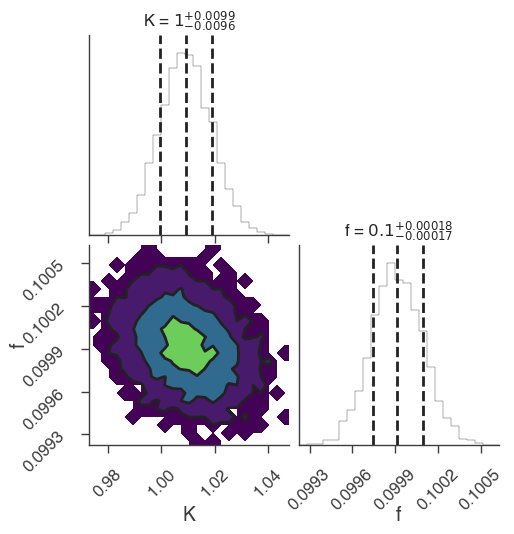

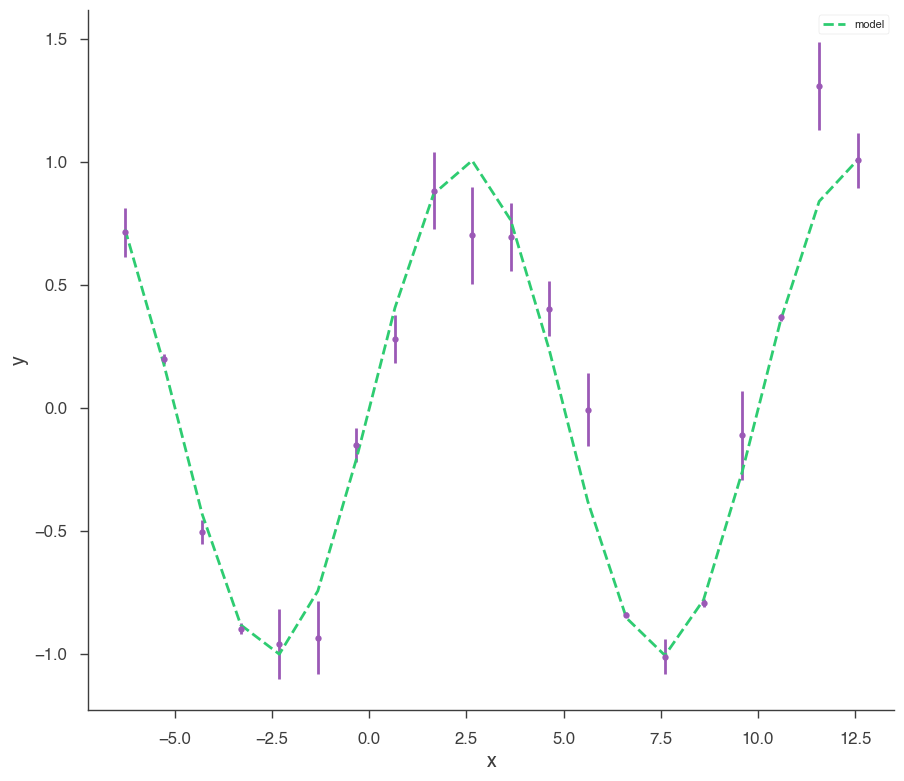

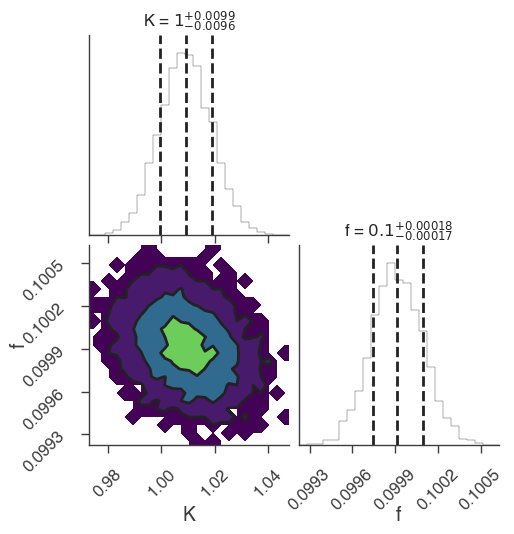

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

22:17:32 INFO      sampler set to zeus                                                     ]8;id=855446;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=341278;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 4/625 [00:00<00:20, 30.79it/s]

Sampling progress :   1%|▏         | 8/625 [00:00<00:19, 32.08it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:19, 32.04it/s]

Sampling progress :   3%|▎         | 16/625 [00:00<00:18, 33.67it/s]

Sampling progress :   3%|▎         | 20/625 [00:00<00:17, 34.95it/s]

Sampling progress :   4%|▍         | 24/625 [00:00<00:16, 36.38it/s]

Sampling progress :   5%|▍         | 29/625 [00:00<00:14, 39.75it/s]

Sampling progress :   5%|▌         | 34/625 [00:00<00:14, 40.20it/s]

Sampling progress :   6%|▌         | 39/625 [00:01<00:13, 41.89it/s]

Sampling progress :   7%|▋         | 44/625 [00:01<00:14, 40.73it/s]

Sampling progress :   8%|▊         | 49/625 [00:01<00:14, 38.74it/s]

Sampling progress :   8%|▊         | 53/625 [00:01<00:14, 38.15it/s]

Sampling progress :   9%|▉         | 57/625 [00:01<00:14, 38.31it/s]

Sampling progress :  10%|▉         | 62/625 [00:01<00:14, 40.01it/s]

Sampling progress :  11%|█         | 67/625 [00:01<00:13, 40.69it/s]

Sampling progress :  12%|█▏        | 72/625 [00:01<00:13, 40.72it/s]

Sampling progress :  12%|█▏        | 77/625 [00:02<00:13, 39.54it/s]

Sampling progress :  13%|█▎        | 81/625 [00:02<00:13, 39.12it/s]

Sampling progress :  14%|█▎        | 85/625 [00:02<00:14, 38.09it/s]

Sampling progress :  14%|█▍        | 89/625 [00:02<00:14, 37.21it/s]

Sampling progress :  15%|█▍        | 93/625 [00:02<00:14, 36.67it/s]

Sampling progress :  16%|█▌        | 97/625 [00:02<00:14, 36.53it/s]

Sampling progress :  16%|█▌        | 101/625 [00:02<00:14, 35.82it/s]

Sampling progress :  17%|█▋        | 105/625 [00:02<00:14, 36.24it/s]

Sampling progress :  17%|█▋        | 109/625 [00:02<00:13, 37.06it/s]

Sampling progress :  18%|█▊        | 113/625 [00:03<00:14, 35.04it/s]

Sampling progress :  19%|█▉        | 118/625 [00:03<00:13, 36.27it/s]

Sampling progress :  20%|█▉        | 122/625 [00:03<00:13, 36.53it/s]

Sampling progress :  20%|██        | 126/625 [00:03<00:13, 37.24it/s]

Sampling progress :  21%|██        | 130/625 [00:03<00:13, 37.86it/s]

Sampling progress :  21%|██▏       | 134/625 [00:03<00:13, 36.97it/s]

Sampling progress :  22%|██▏       | 138/625 [00:03<00:12, 37.50it/s]

Sampling progress :  23%|██▎       | 142/625 [00:03<00:13, 37.01it/s]

Sampling progress :  23%|██▎       | 146/625 [00:03<00:12, 37.39it/s]

Sampling progress :  24%|██▍       | 150/625 [00:03<00:12, 37.27it/s]

Sampling progress :  25%|██▍       | 154/625 [00:04<00:12, 37.52it/s]

Sampling progress :  25%|██▌       | 158/625 [00:04<00:12, 37.53it/s]

Sampling progress :  26%|██▌       | 162/625 [00:04<00:12, 37.54it/s]

Sampling progress :  27%|██▋       | 166/625 [00:04<00:12, 37.59it/s]

Sampling progress :  27%|██▋       | 170/625 [00:04<00:12, 35.54it/s]

Sampling progress :  28%|██▊       | 174/625 [00:04<00:12, 35.83it/s]

Sampling progress :  28%|██▊       | 178/625 [00:04<00:12, 35.61it/s]

Sampling progress :  29%|██▉       | 182/625 [00:04<00:12, 35.79it/s]

Sampling progress :  30%|██▉       | 186/625 [00:05<00:12, 35.20it/s]

Sampling progress :  30%|███       | 190/625 [00:05<00:12, 34.92it/s]

Sampling progress :  31%|███       | 194/625 [00:05<00:12, 35.36it/s]

Sampling progress :  32%|███▏      | 198/625 [00:05<00:11, 36.31it/s]

Sampling progress :  32%|███▏      | 202/625 [00:05<00:12, 34.68it/s]

Sampling progress :  33%|███▎      | 206/625 [00:05<00:11, 34.92it/s]

Sampling progress :  34%|███▎      | 210/625 [00:05<00:11, 35.42it/s]

Sampling progress :  34%|███▍      | 214/625 [00:05<00:11, 35.48it/s]

Sampling progress :  35%|███▍      | 218/625 [00:05<00:11, 35.24it/s]

Sampling progress :  36%|███▌      | 222/625 [00:06<00:11, 36.54it/s]

Sampling progress :  36%|███▌      | 226/625 [00:06<00:11, 34.58it/s]

Sampling progress :  37%|███▋      | 230/625 [00:06<00:12, 32.31it/s]

Sampling progress :  37%|███▋      | 234/625 [00:06<00:12, 31.78it/s]

Sampling progress :  38%|███▊      | 238/625 [00:06<00:12, 31.59it/s]

Sampling progress :  39%|███▊      | 242/625 [00:06<00:11, 32.16it/s]

Sampling progress :  39%|███▉      | 246/625 [00:06<00:12, 30.27it/s]

Sampling progress :  40%|████      | 250/625 [00:06<00:12, 30.69it/s]

Sampling progress :  41%|████      | 254/625 [00:07<00:11, 31.82it/s]

Sampling progress :  41%|████▏     | 258/625 [00:07<00:11, 33.33it/s]

Sampling progress :  42%|████▏     | 262/625 [00:07<00:11, 31.05it/s]

Sampling progress :  43%|████▎     | 266/625 [00:07<00:11, 31.24it/s]

Sampling progress :  43%|████▎     | 270/625 [00:07<00:11, 31.53it/s]

Sampling progress :  44%|████▍     | 274/625 [00:07<00:10, 32.12it/s]

Sampling progress :  44%|████▍     | 278/625 [00:07<00:10, 33.45it/s]

Sampling progress :  45%|████▌     | 282/625 [00:07<00:09, 34.55it/s]

Sampling progress :  46%|████▌     | 286/625 [00:07<00:09, 35.34it/s]

Sampling progress :  46%|████▋     | 290/625 [00:08<00:09, 35.48it/s]

Sampling progress :  47%|████▋     | 295/625 [00:08<00:08, 37.68it/s]

Sampling progress :  48%|████▊     | 299/625 [00:08<00:08, 37.74it/s]

Sampling progress :  48%|████▊     | 303/625 [00:08<00:08, 36.64it/s]

Sampling progress :  49%|████▉     | 307/625 [00:08<00:08, 37.32it/s]

Sampling progress :  50%|████▉     | 311/625 [00:08<00:08, 36.77it/s]

Sampling progress :  51%|█████     | 316/625 [00:08<00:08, 37.27it/s]

Sampling progress :  51%|█████     | 320/625 [00:08<00:08, 36.61it/s]

Sampling progress :  52%|█████▏    | 324/625 [00:09<00:08, 35.56it/s]

Sampling progress :  52%|█████▏    | 328/625 [00:09<00:09, 32.53it/s]

Sampling progress :  53%|█████▎    | 332/625 [00:09<00:09, 30.70it/s]

Sampling progress :  54%|█████▍    | 336/625 [00:09<00:08, 32.20it/s]

Sampling progress :  54%|█████▍    | 340/625 [00:09<00:08, 32.61it/s]

Sampling progress :  55%|█████▌    | 344/625 [00:09<00:08, 33.23it/s]

Sampling progress :  56%|█████▌    | 348/625 [00:09<00:08, 33.89it/s]

Sampling progress :  56%|█████▋    | 352/625 [00:09<00:07, 34.62it/s]

Sampling progress :  57%|█████▋    | 356/625 [00:09<00:07, 35.94it/s]

Sampling progress :  58%|█████▊    | 360/625 [00:10<00:07, 36.52it/s]

Sampling progress :  58%|█████▊    | 365/625 [00:10<00:06, 37.42it/s]

Sampling progress :  59%|█████▉    | 369/625 [00:10<00:06, 37.84it/s]

Sampling progress :  60%|█████▉    | 374/625 [00:10<00:06, 38.47it/s]

Sampling progress :  60%|██████    | 378/625 [00:10<00:06, 37.77it/s]

Sampling progress :  61%|██████    | 382/625 [00:10<00:06, 37.36it/s]

Sampling progress :  62%|██████▏   | 386/625 [00:10<00:06, 37.13it/s]

Sampling progress :  62%|██████▏   | 390/625 [00:10<00:06, 36.68it/s]

Sampling progress :  63%|██████▎   | 394/625 [00:11<00:06, 36.96it/s]

Sampling progress :  64%|██████▎   | 398/625 [00:11<00:07, 32.20it/s]

Sampling progress :  64%|██████▍   | 402/625 [00:11<00:06, 32.17it/s]

Sampling progress :  65%|██████▍   | 406/625 [00:11<00:06, 32.93it/s]

Sampling progress :  66%|██████▌   | 410/625 [00:11<00:06, 34.05it/s]

Sampling progress :  66%|██████▌   | 414/625 [00:11<00:06, 34.64it/s]

Sampling progress :  67%|██████▋   | 418/625 [00:11<00:05, 35.60it/s]

Sampling progress :  68%|██████▊   | 422/625 [00:11<00:05, 36.32it/s]

Sampling progress :  68%|██████▊   | 426/625 [00:11<00:05, 35.89it/s]

Sampling progress :  69%|██████▉   | 430/625 [00:12<00:05, 35.57it/s]

Sampling progress :  70%|██████▉   | 435/625 [00:12<00:05, 37.40it/s]

Sampling progress :  70%|███████   | 440/625 [00:12<00:04, 39.31it/s]

Sampling progress :  71%|███████   | 444/625 [00:12<00:04, 37.74it/s]

Sampling progress :  72%|███████▏  | 448/625 [00:12<00:04, 38.04it/s]

Sampling progress :  72%|███████▏  | 452/625 [00:12<00:04, 36.61it/s]

Sampling progress :  73%|███████▎  | 456/625 [00:12<00:04, 36.46it/s]

Sampling progress :  74%|███████▎  | 460/625 [00:12<00:04, 36.10it/s]

Sampling progress :  74%|███████▍  | 465/625 [00:12<00:04, 37.58it/s]

Sampling progress :  75%|███████▌  | 469/625 [00:13<00:04, 37.24it/s]

Sampling progress :  76%|███████▌  | 473/625 [00:13<00:04, 37.06it/s]

Sampling progress :  76%|███████▋  | 477/625 [00:13<00:04, 36.43it/s]

Sampling progress :  77%|███████▋  | 481/625 [00:13<00:03, 36.40it/s]

Sampling progress :  78%|███████▊  | 485/625 [00:13<00:03, 36.89it/s]

Sampling progress :  78%|███████▊  | 489/625 [00:13<00:03, 35.56it/s]

Sampling progress :  79%|███████▉  | 493/625 [00:13<00:03, 35.37it/s]

Sampling progress :  80%|███████▉  | 497/625 [00:13<00:03, 35.23it/s]

Sampling progress :  80%|████████  | 501/625 [00:13<00:03, 35.88it/s]

Sampling progress :  81%|████████  | 505/625 [00:14<00:03, 35.91it/s]

Sampling progress :  81%|████████▏ | 509/625 [00:14<00:03, 36.36it/s]

Sampling progress :  82%|████████▏ | 513/625 [00:14<00:03, 36.22it/s]

Sampling progress :  83%|████████▎ | 517/625 [00:14<00:02, 36.56it/s]

Sampling progress :  83%|████████▎ | 521/625 [00:14<00:02, 35.50it/s]

Sampling progress :  84%|████████▍ | 525/625 [00:14<00:02, 36.34it/s]

Sampling progress :  85%|████████▍ | 529/625 [00:14<00:02, 36.91it/s]

Sampling progress :  85%|████████▌ | 533/625 [00:14<00:02, 36.88it/s]

Sampling progress :  86%|████████▌ | 538/625 [00:14<00:02, 40.42it/s]

Sampling progress :  87%|████████▋ | 543/625 [00:15<00:02, 37.51it/s]

Sampling progress :  88%|████████▊ | 547/625 [00:15<00:02, 34.28it/s]

Sampling progress :  88%|████████▊ | 551/625 [00:15<00:02, 33.99it/s]

Sampling progress :  89%|████████▉ | 555/625 [00:15<00:02, 31.46it/s]

Sampling progress :  89%|████████▉ | 559/625 [00:15<00:02, 32.58it/s]

Sampling progress :  90%|█████████ | 563/625 [00:15<00:01, 33.55it/s]

Sampling progress :  91%|█████████ | 567/625 [00:15<00:01, 34.66it/s]

Sampling progress :  91%|█████████▏| 571/625 [00:15<00:01, 35.94it/s]

Sampling progress :  92%|█████████▏| 575/625 [00:16<00:01, 36.06it/s]

Sampling progress :  93%|█████████▎| 580/625 [00:16<00:01, 37.33it/s]

Sampling progress :  93%|█████████▎| 584/625 [00:16<00:01, 37.25it/s]

Sampling progress :  94%|█████████▍| 588/625 [00:16<00:00, 37.55it/s]

Sampling progress :  95%|█████████▍| 592/625 [00:16<00:00, 37.28it/s]

Sampling progress :  95%|█████████▌| 596/625 [00:16<00:00, 37.31it/s]

Sampling progress :  96%|█████████▌| 601/625 [00:16<00:00, 38.04it/s]

Sampling progress :  97%|█████████▋| 606/625 [00:16<00:00, 39.22it/s]

Sampling progress :  98%|█████████▊| 610/625 [00:16<00:00, 39.16it/s]

Sampling progress :  98%|█████████▊| 614/625 [00:17<00:00, 35.16it/s]

Sampling progress :  99%|█████████▉| 618/625 [00:17<00:00, 36.01it/s]

Sampling progress : 100%|█████████▉| 622/625 [00:17<00:00, 34.99it/s]

Sampling progress : 100%|██████████| 625/625 [00:17<00:00, 35.82it/s]

22:17:51 INFO      fit restored to maximum of posterior                                         ]8;id=180854;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=584627;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=986401;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=998642;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 23


Scale Factor: 1.309053


Mean Integrated Autocorrelation Time: 2.96


Effective Sample Size: 4217.01


Number of Log Probability Evaluations: 65094


Effective Samples per Log Probability Evaluation: 0.064783


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.009 -0.010 +0.009,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.991 +/- 0.018) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-14.402694
total,-14.402694


Values of statistical measures:

,statistical measures
AIC,33.511270
BIC,34.796852
DIC,32.581680
PDIC,1.888058


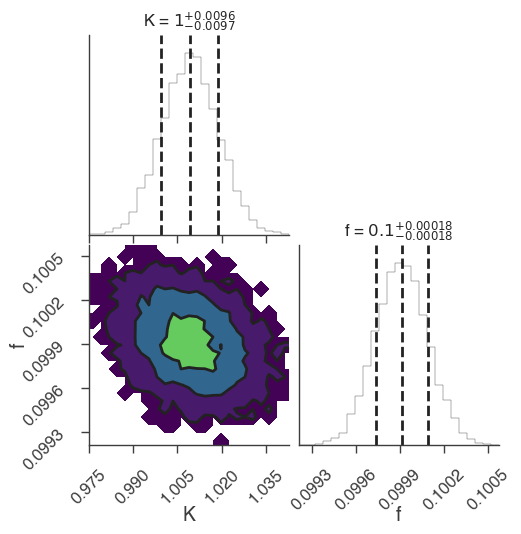

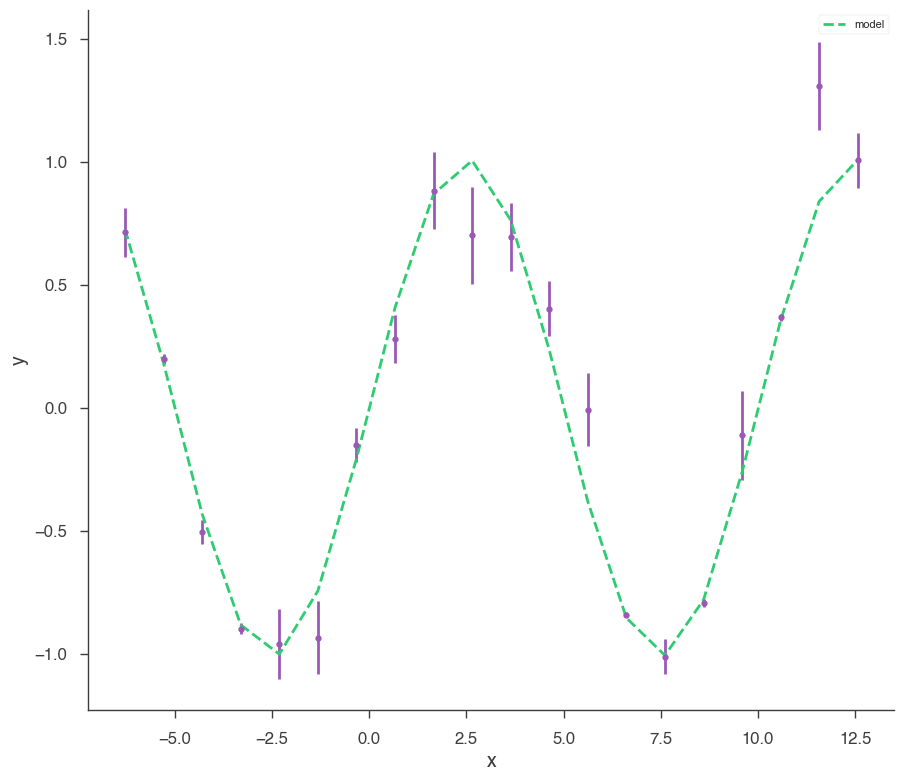

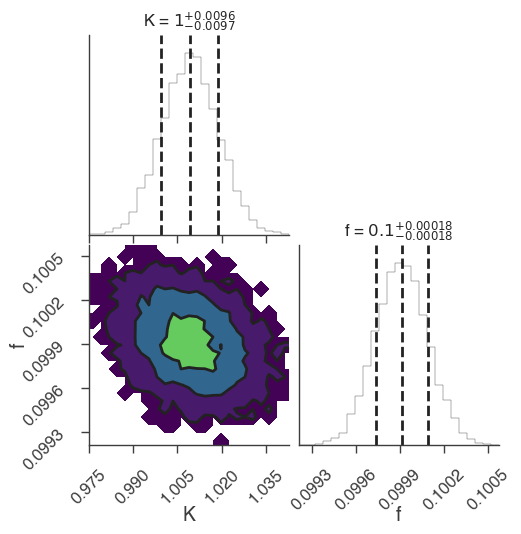

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

22:17:52 INFO      sampler set to ultranest                                                ]8;id=826660;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=826067;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 12718


[ultranest]   logZ = -25.55 +- 0.1225


[ultranest] Effective samples strategy satisfied (ESS = 974.6, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.16 bs:0.12 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


22:18:05 INFO      fit restored to maximum of posterior                                         ]8;id=594922;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=299378;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=389678;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=833018;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.009 -0.009 +0.010,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.991 +/- 0.018) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-14.404171
total,-14.404171


Values of statistical measures:

,statistical measures
AIC,33.514224
BIC,34.799806
DIC,32.688597
PDIC,1.941286
log(Z),-11.096520


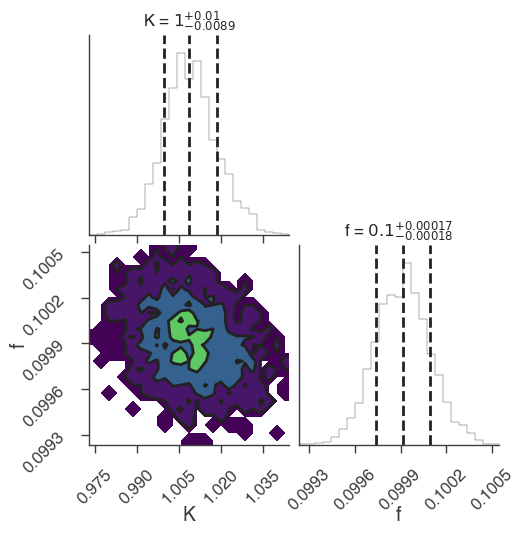

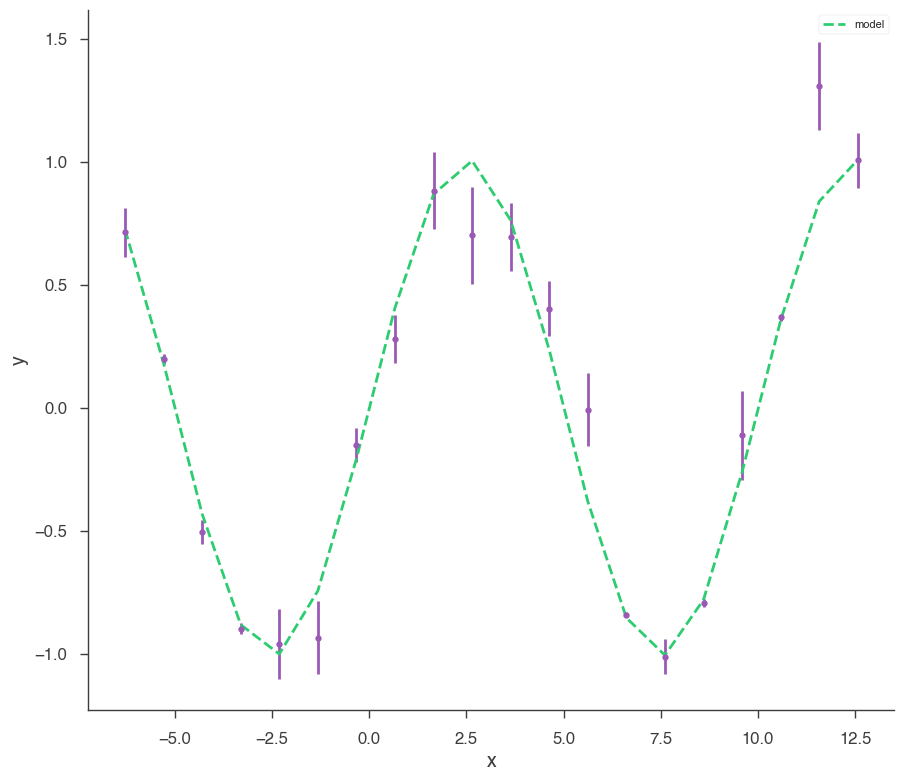

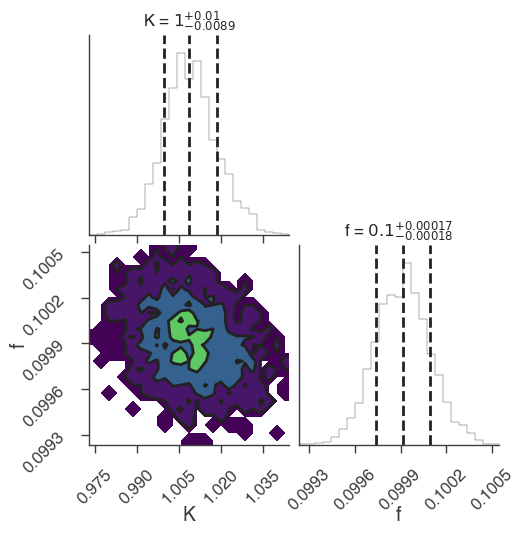

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()